# R portion of the analysis

## Linear regression on the 2002 season

### Same set as the Python portion

Paul DePodesta made a prediction. It would take 95 wins to make the playoffs and the team would have to score 135 more points than they conceed to win that many games. 

In [1]:
setwd("/Users/falco/Downloads/DM1 Project")
baseball = read.csv("baseball.csv")
str(baseball)

'data.frame':	1232 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 2 3 4 5 7 8 9 10 11 12 ...
 $ League      : Factor w/ 2 levels "AL","NL": 2 2 1 1 2 1 2 1 2 1 ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ RS          : int  734 700 712 734 613 748 669 667 758 726 ...
 $ RA          : int  688 600 705 806 759 676 588 845 890 670 ...
 $ W           : int  81 94 93 69 61 85 97 68 64 88 ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ Playoffs    : int  0 1 1 0 0 0 1 0 0 1 ...
 $ RankSeason  : int  NA 4 5 NA NA NA 2 NA NA 6 ...
 $ RankPlayoffs: int  NA 5 4 NA NA NA 4 NA NA 2 ...
 $ G           : int  162 162 162 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.3

### Prune the data to just 2002

In [2]:
moneyball = subset(baseball, Year < 2002)
str(moneyball)

'data.frame':	902 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

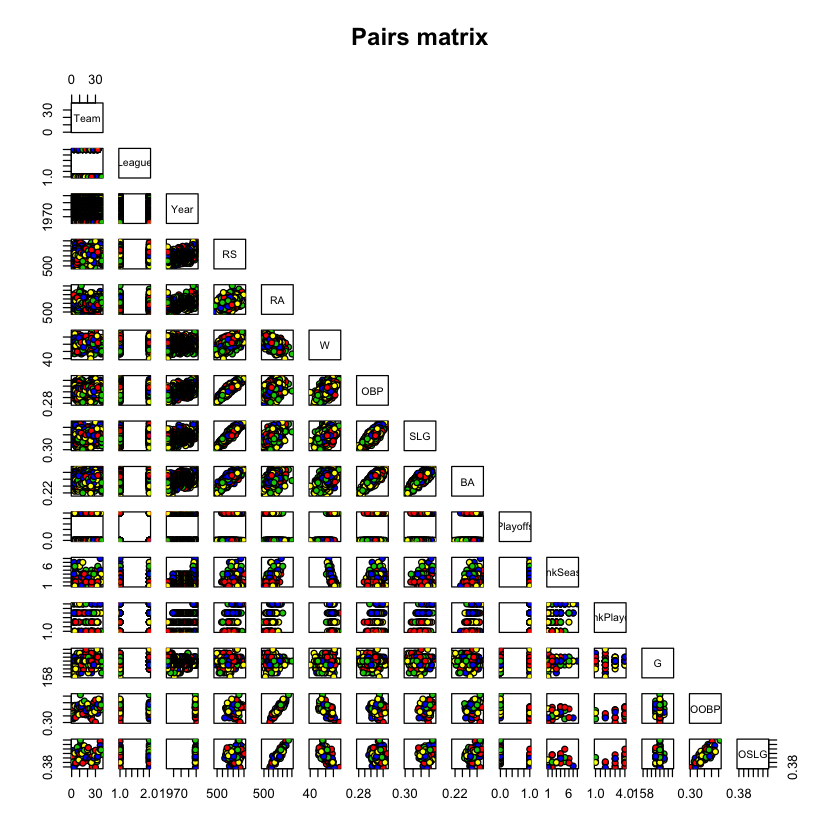

In [3]:
pairs = moneyball
pairs(pairs, labels = colnames(pairs), main = "Pairs matrix", pch = 21,
bg = c("red", "green3", "blue", "yellow"), upper.panel = NULL)

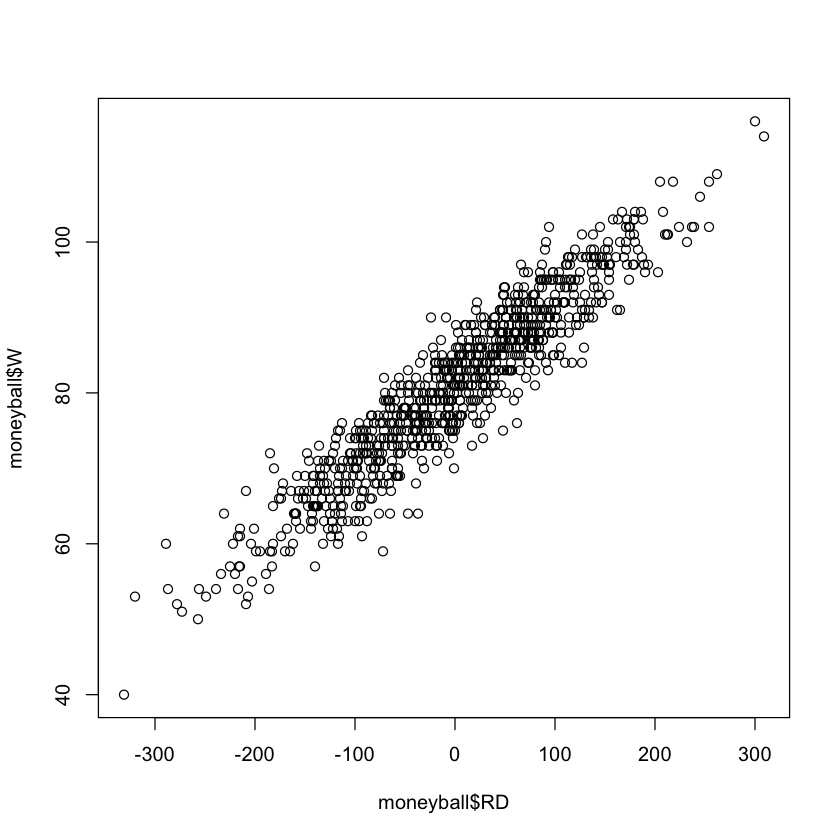

In [4]:
moneyball$RD = moneyball$RS - moneyball$RA
plot(moneyball$RD, moneyball$W)

In [5]:
regression_won_games = lm(W ~ RD, data=moneyball)
summary(regression_won_games)


Call:
lm(formula = W ~ RD, data = moneyball)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2662  -2.6509   0.1234   2.9364  11.6570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.881375   0.131157  616.67   <2e-16 ***
RD           0.105766   0.001297   81.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.939 on 900 degrees of freedom
Multiple R-squared:  0.8808,	Adjusted R-squared:  0.8807 
F-statistic:  6651 on 1 and 900 DF,  p-value: < 2.2e-16


We can see that RD is very significant and the R squared value is high (0.88). This makes sense.

From this model we get the equation Wins = 80.88 + 0.1058 (RD)

For Paul's prediction we want at least 95 wins, therefore (95 - 80.88) / 0.1058 = 133

In 2002 you would need at least a 133 Run Difference to win 95 games. Paul was very close.

### Offensive Stats

At the time the batting average was the dominant offensive stat. The A's claimed OBP and SLG were more important.

Here we will build a model with the 3 offensive stats to maximize Runs Scored: OBP, SLG, and BA

In [6]:
regression_points_scored=lm(RS ~ OBP + SLG + BA, data=moneyball)
summary(regression_points_scored)


Call:
lm(formula = RS ~ OBP + SLG + BA, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.941 -17.247  -0.621  16.754  90.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -788.46      19.70 -40.029  < 2e-16 ***
OBP          2917.42     110.47  26.410  < 2e-16 ***
SLG          1637.93      45.99  35.612  < 2e-16 ***
BA           -368.97     130.58  -2.826  0.00482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.69 on 898 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:   0.93 
F-statistic:  3989 on 3 and 898 DF,  p-value: < 2.2e-16


In [7]:
regression_runs_scored=lm(RS ~ OBP + SLG, data=moneyball)
summary(regression_runs_scored)


Call:
lm(formula = RS ~ OBP + SLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.838 -17.174  -1.108  16.770  90.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -804.63      18.92  -42.53   <2e-16 ***
OBP          2737.77      90.68   30.19   <2e-16 ***
SLG          1584.91      42.16   37.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.79 on 899 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9294 
F-statistic:  5934 on 2 and 899 DF,  p-value: < 2.2e-16


Here our model is simpler and makes more sense, while keeping our error almost the same. The claim about batting average is confirmed and it seems OBP is the most significant indicator. 

### Defensive Stats

In [8]:
regression_runs_allowed=lm(RA ~ OOBP + OSLG, data=moneyball)
summary(regression_runs_allowed)


Call:
lm(formula = RA ~ OOBP + OSLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.397 -15.178  -0.129  17.679  60.955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -837.38      60.26 -13.897  < 2e-16 ***
OOBP         2913.60     291.97   9.979 4.46e-16 ***
OSLG         1514.29     175.43   8.632 2.55e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.67 on 87 degrees of freedom
  (812 observations deleted due to missingness)
Multiple R-squared:  0.9073,	Adjusted R-squared:  0.9052 
F-statistic: 425.8 on 2 and 87 DF,  p-value: < 2.2e-16


## Predicting the A's 2002 season

RS = -804.63 + 2737.77 (OBP) + 1584.91 (SLG)
For 2001 OBP = 0.345 and SLG = 0.439, therefore they would score 836 runs.

RA = -837.38 + 2913.60 (OOBP) + 1514.29 (OSLG)
For 2001 OOBP = 0.308 and OSLG = 0.38, therefore they would allow 635 runs.

RD = RS - RA = 201
Wins = 80.8814 + 0.1058 (201) = 102

The prediction was 836 scored vs actual which was 800, 635 allowed predicted vs 654 actual, and 102 wins predicted vs 103 actual.

## Go to Excel to evaluate all teams from 2001